# Bank transactions

To get started let's import some libraries and take a look at our dataset.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

df = pd.read_csv('transactions_dataset.csv')
print(df.shape)
df.head()

(30219, 7)


,transaction_id,account_timestamp,amt,fee,transaction_details,transaction_timestamp,account_no
0,0,2021-06-25 21:47:48,701.40,14.9589,TYPE_1,2021-07-23 20:12:46,1
1,1,2021-04-09 02:42:41,1870.40,14.9589,TYPE_1,2021-08-20 14:37:06,2
2,4,2021-04-12 23:57:14,70140.00,11.9369,TYPE_1,2021-08-13 19:01:56,3
3,5,2021-02-26 23:15:56,2338.00,14.9589,TYPE_1,2021-07-01 14:25:54,4
4,9,2021-06-02 18:02:26,2256.17,14.9589,TYPE_1,2021-06-04 17:37:23,5


The dataset we'll be exploring is a small fintech startup transactions dataset where each line is a transaction made by a user.

Let's start answering the questions.

## Q2. Is the number of transactions significantly raising over time?


In [11]:
# transform transaction_timestamp column into datetime format
df.transaction_timestamp = pd.to_datetime(df.transaction_timestamp)

# create month column with only the name of the month of transaction_timestamp
month_dict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['month'] = df['transaction_timestamp'].dt.month.map(month_dict)

# create balance_month column with only the number of the month of account_timestamp
df['balance_month'] = df['transaction_timestamp'].dt.month

In [12]:
g = df.copy()
g = g[g.transaction_details != 'FEE']

g = df.groupby(['balance_month', 'month'])['transaction_id'].count().reset_index()
g = g.rename(columns={'transaction_id': 'count'})
g.sort_values('count', ascending=True)

,balance_month,month,count
0,1,Jan,52
1,2,Feb,79
11,12,Dec,638
10,11,Nov,661
9,10,Oct,782
2,3,Mar,1617
8,9,Sep,2294
3,4,Apr,2940
4,5,May,4080
5,6,Jun,5377


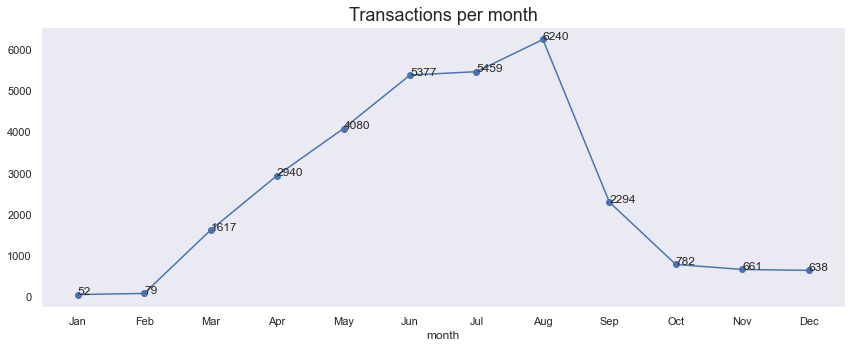

In [13]:
# plot the number of transactions per month over time
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(g['month'], g['count'])
ax.set_title("Transactions per month", size=18)
ax.set_xlabel("month", size=12)

plt.xticks(g.month)

for i in range(len(g)):
    plt.plot(g['month'][i], g['count'][i], 'bo')
    ax.annotate(g['count'][i], (g['month'][i], g['count'][i]))

plt.tight_layout()

It seems the users significatly increased the usage of transactions services during the second and third quarter of last year but had a sudden drop at the last quarter.

This is a very important information for the bank, as the goal is to increase the number of transactions over time, or at least maintain it. This could be a source for a metric that will monitor how strong the users membership is.

We could get a little deeper here and investigate if the number of transactions has any correlation with the number of new users.

In [14]:
# transform account_timestamp column into datetime format
df.account_timestamp = pd.to_datetime(df.account_timestamp)

# make new column with month and year of account creation
df['u_month_year'] = df['account_timestamp'].dt.to_period('M')

In [15]:
u = df.copy()
u = df.groupby(['u_month_year'])['account_no'].nunique().reset_index()
u['u_month_year'] = u['u_month_year'].dt.strftime('%Y-%m')
u = u.rename(columns={'account_no': 'acc_count'})
u

,u_month_year,acc_count
0,2020-11,2
1,2020-12,1
2,2021-01,4
3,2021-02,8
4,2021-03,733
5,2021-04,566
6,2021-05,523
7,2021-06,673
8,2021-07,546
9,2021-08,263


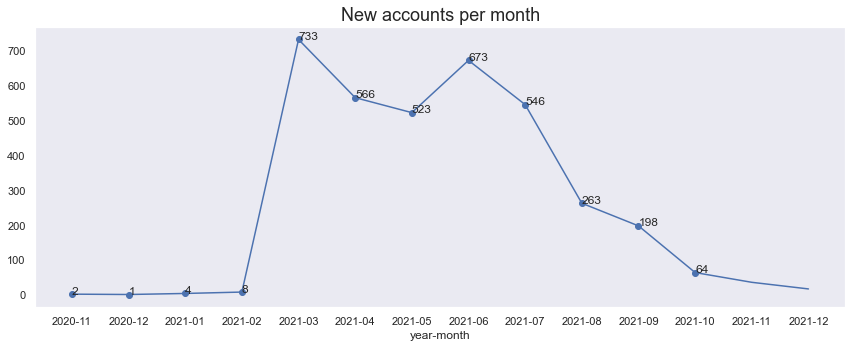

In [16]:
# plot the number of new users per month over time
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(u['u_month_year'], u['acc_count'])
ax.set_title("New accounts per month", size=18)
ax.set_xlabel("year-month", size=12)

for i in range(len(g)):
    plt.plot(u['u_month_year'][i], u['acc_count'][i], 'bo')
    ax.annotate(u['acc_count'][i], (u['u_month_year'][i], u['acc_count'][i]))


plt.tight_layout()

It looks like the rise in the number of transactions can strongly be explained by a big raise in the number of users at the begining of the second quarter of last year.

The new users could start getting comfortable with the bank's services and that made the number of transactions grow beautifully until August.

The sudden drop on the number of transactions can be partially explained by the number of new users dropping after June but it could be linked to something else as well.